In [1]:
from defectlib import extract_bnfeatures_from_defect, train_svm_classifier, plot_tsne
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [8]:
features, labels, sns, images = extract_bnfeatures_from_defect('./ben1214/J3801/')
features_test, labels_test, sns_test, images_test = extract_bnfeatures_from_defect('./defect_tensors_D10/J3801/')
features_all = np.concatenate((features, features_test))
labels_all = np.concatenate((labels, labels_test))
sns_all = np.concatenate((sns, sns_test))
images_all = np.concatenate((images, images_test))

there are 27 images inside J3801_8A_c1
Processing ./ben1214/J3801/8A/J3801_8A_c1/F3Y636300BHGY4T9 8AAAAAA_0.jpg...
there are 18 images inside J3801_8A_c10
Processing ./ben1214/J3801/8A/J3801_8A_c10/F3Y63620E6XGY4R9 8AAAAAA_0.jpg...
there are 20 images inside J3801_8A_c2
Processing ./ben1214/J3801/8A/J3801_8A_c2/F3Y64911UELGY4TA 8AAAAAA_0.jpg...
there are 15 images inside J3801_8A_c0
Processing ./defect_tensors_D10/J3801/8A/J3801_8A_c0/0 8AAAAAA_0.jpg...
there are 2 images inside J3801_8A_c1
Processing ./defect_tensors_D10/J3801/8A/J3801_8A_c1/F3Y649519FXGY4TA 8AAAAAA_0.jpg...
there are 3 images inside J3801_8A_c10
Processing ./defect_tensors_D10/J3801/8A/J3801_8A_c10/F3Y649607RPGY4TA 8AAAAAA_0.jpg...
there are 4 images inside J3801_8A_c2
Processing ./defect_tensors_D10/J3801/8A/J3801_8A_c2/F3Y64930GUBGY4TA 8AAAAAA_0.jpg...


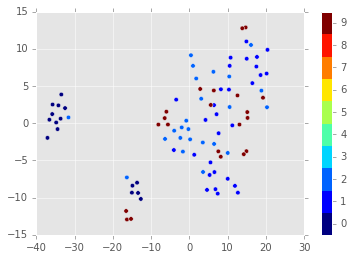

In [9]:
plot_tsne(features_all, labels_all, sns_all, perplexity=10, interactive=False, images=images_all)

In [15]:
train_svm_classifier(features_all, labels_all, sns_all, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.521739, total=   0.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.590909, total=   0.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.571429, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.521739, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.590909, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.571429, total=   0.0s
[CV] kernel=linear, C=100 ....................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............. kernel=linear, C=100, score=0.521739, total=   0.0s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.590909, total=   0.0s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.571429, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=0.521739, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=0.590909, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=0.571429, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.347826, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.0s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [6]:
for label_class in set(labels_all):
    sns_in_label = sns_all[labels_all == label_class]
    print 'the number of class {} is {}'.format(label_class, len(sns_in_label))
    #for sn in set(sns_in_label):
        # print '\tthe number of S\N {}:{}'.format(sn, len(sns_all[(labels_all == label_class) & (sns_all == sn)]))

the number of class 1 is 29
the number of class 10 is 21
the number of class 2 is 24
the number of class 0 is 15


In [11]:
from bokeh.plotting import figure, output_notebook
output_notebook()
from bokeh.plotting import figure, show
from tsne import bh_sne

Loading BokehJS ...

In [13]:
plot_tsne(features_all, labels_all, sns_all, perplexity=10, interactive=True, images=images_all)

In [16]:
from defectlib import create_graph

In [17]:
create_graph('./inception_dec_2015/tensorflow_inception_graph.pb')

In [18]:
import tensorflow as tf

In [19]:
sess = tf.Session()

In [21]:
sess.graph

In [22]:
from tensorflow.python.platform import gfile

In [24]:
sess.close()

In [25]:
from defectlib import extract_images_from_dir

In [31]:
images = extract_images_from_dir('./defect_tensors/Conn1/10/Conn1_10_c0/', comb=False)

In [34]:
image_data = gfile.FastGFile(images[0], 'rb').read()

In [35]:
image_data

'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xae\x00\x00\x00;\x08\x02\x00\x00\x00m\xc5&I\x00\x00\x00\x06bKGD\x00\x00\x00\x00\x00\x00\xf9C\xbb\x7f\x00\x00\x00\tpHYs\x00\x00\x00\x15\x00\x00\x00\x15\x00\xf9\xccS\x0e\x00\x00\x00\x0funIt==\'\xbe==\'\xbe\x03NIIMAQKLx?\x00\x00\x006zTXtVersion\x00\x00x\x01\xf3K,\xc9\xcc\xcfK\xccQ\xf0\xcc+.)*\xcdM\xcd+)V\xf0\xf4u\x0cT\x08\xcb,\x06\xca(X\xe8\x99\xe9\x19\x00\x00\x12y\x0c\xfdZ\xd0|y\x00\x00\x00\x0ftEXtNI Image Type\x004\xc9\xc1\xcfz\x00\x00 \x00IDATx\x01\xec\xbce\x93dYv%:?\xe7\x8d\xa0\x8b\xba\xaa\x92"\x8332\x98#\x9c\x19\xae\xfb\x05gffff\x08\xf0`\xe6\xc4\xca\xcc\xc2\xaenI\xdd\xd2H\x9a1\xbdy\xa6\x9f\xf1\xb6gH\xea.\xd93\x9b/3f2\xd9+[v\xeb\xdc\x1b\xd7=2\xfc\xac\xbb\xf7>{\xad\xe3\xff\xe5\xbf\xfc\xeb\x7f\xcfW-\x93k\xd6\xa9u\xdb4\xc9>Cv\xccR\x9csT\xd7<\xdd\xb5\xc0p-2\xdd\xf3t\xe7\xbf\xdd\xf9\xff\x0f\xfe\x93\x7f\x02\xa3K\xfa\x895\xf3\x14\xd96C\xb1\xcfP\x1c\xb3}\x1e\xb8\x17\xe8\xeeE\x86\x070Os\xcdQ\x9d\xf34\'pb\x8e\x06,q\xceR\x1c3d\xdb\x14\xc9<M\xb2\xc

In [37]:
next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0')

In [38]:
next_to_last_tensor

<tf.Tensor 'pool_3:0' shape=(1, 1, 1, 2048) dtype=float32>

In [40]:
predictions = sess.run(next_to_last_tensor,
                      {'DecodeJpeg/contents:0': image_data}
                      )

InvalidArgumentError: Invalid JPEG data, size 21206
	 [[Node: DecodeJpeg = DecodeJpeg[acceptable_fraction=1, channels=3, fancy_upscaling=true, ratio=1, try_recover_truncated=false, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_DecodeJpeg/contents_0)]]

Caused by op u'DecodeJpeg', defined at:
  File "/usr/local/Cellar/python/2.7.12/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/local/Cellar/python/2.7.12/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2705, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2809, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2869, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-63250612a6f5>", line 1, in <module>
    features, labels, sns, images = extract_bnfeatures_from_defect('./ben1214/J3801/')
  File "defectlib/Transform.py", line 443, in extract_bnfeatures_from_defect
    features, labels, sns, images = extract_bnfeatures_from_angle(angle_path, comb=comb)
  File "defectlib/Transform.py", line 394, in extract_bnfeatures_from_angle
    features = extract_bottleneck_features(images_list)
  File "defectlib/Transform.py", line 337, in extract_bottleneck_features
    create_graph('./inception_dec_2015/tensorflow_inception_graph.pb')
  File "defectlib/Transform.py", line 311, in create_graph
    _ = tf.import_graph_def(graph_def, name='')
  File "/Users/hadoop1/.virtualenvs/cv/lib/python2.7/site-packages/tensorflow/python/framework/importer.py", line 285, in import_graph_def
    op_def=op_def)
  File "/Users/hadoop1/.virtualenvs/cv/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/hadoop1/.virtualenvs/cv/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Invalid JPEG data, size 21206
	 [[Node: DecodeJpeg = DecodeJpeg[acceptable_fraction=1, channels=3, fancy_upscaling=true, ratio=1, try_recover_truncated=false, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_DecodeJpeg/contents_0)]]
